# EDA 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [9]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\archive (2)\smev_data.csv")

In [10]:
df

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


In [11]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        24 non-null     object
 1   financial_year  24 non-null     object
 2   num_vehicles    24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [12]:
df['start_year'] = df['financial_year'].apply(lambda x: int(x.split('-')[0]))
df['end_year'] = df['financial_year'].apply(lambda x: int(x.split('-')[1]) + 2000)  
df['period'] = df['end_year'] - df['start_year']  

print(df.head())

       category financial_year  num_vehicles  start_year  end_year  period
0  E-2 Wheelers        2017-18          1981        2017      2018       1
1  E-2 Wheelers        2018-19         27478        2018      2019       1
2  E-2 Wheelers        2019-20         26512        2019      2020       1
3  E-2 Wheelers        2020-21         44294        2020      2021       1
4  E-2 Wheelers        2021-22        249615        2021      2022       1


In [13]:
df['growth_rate'] = df.groupby('category')['num_vehicles'].pct_change() * 100
print(df.head())

       category financial_year  num_vehicles  start_year  end_year  period  \
0  E-2 Wheelers        2017-18          1981        2017      2018       1   
1  E-2 Wheelers        2018-19         27478        2018      2019       1   
2  E-2 Wheelers        2019-20         26512        2019      2020       1   
3  E-2 Wheelers        2020-21         44294        2020      2021       1   
4  E-2 Wheelers        2021-22        249615        2021      2022       1   

   growth_rate  
0          NaN  
1  1287.077234  
2    -3.515540  
3    67.071515  
4   463.541337  


## Distribution of Vehicles by Category

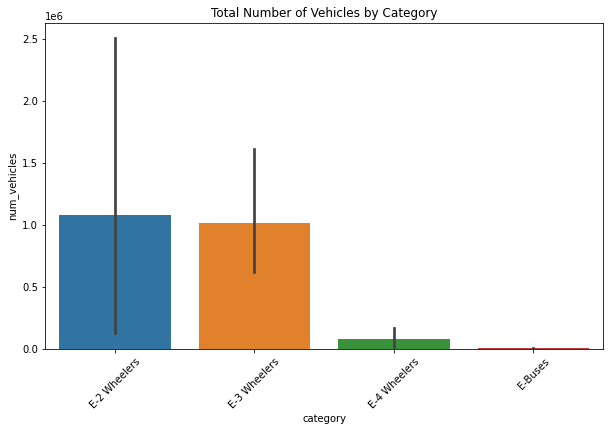

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='num_vehicles', data=df, estimator=sum)
plt.title('Total Number of Vehicles by Category')
plt.xticks(rotation=45)
plt.show()

## Trend of Vehicles Over Years

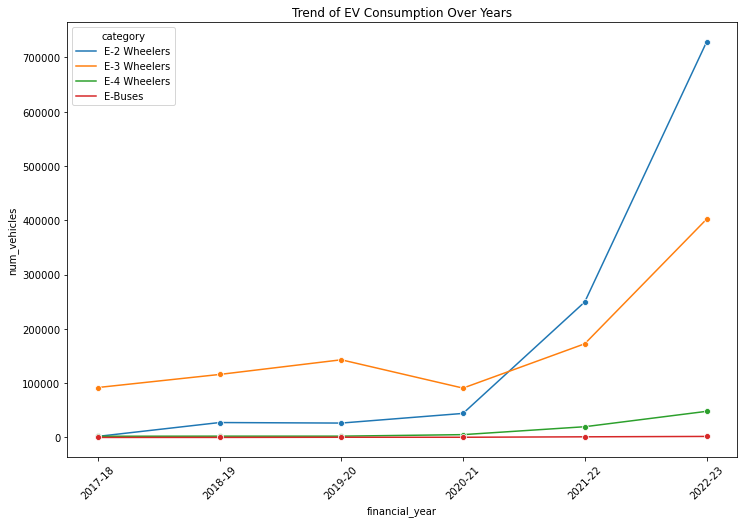

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='financial_year', y='num_vehicles', hue='category', data=df, marker='o')
plt.title('Trend of EV Consumption Over Years')
plt.xticks(rotation=45)
plt.show()

## Growth Rate Analysis


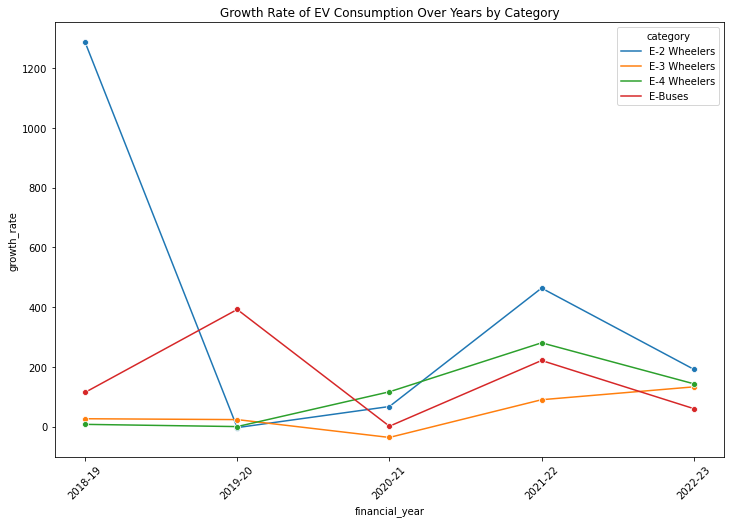

In [16]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='financial_year', y='growth_rate', hue='category', data=df, marker='o')
plt.title('Growth Rate of EV Consumption Over Years by Category')
plt.xticks(rotation=45)
plt.show()

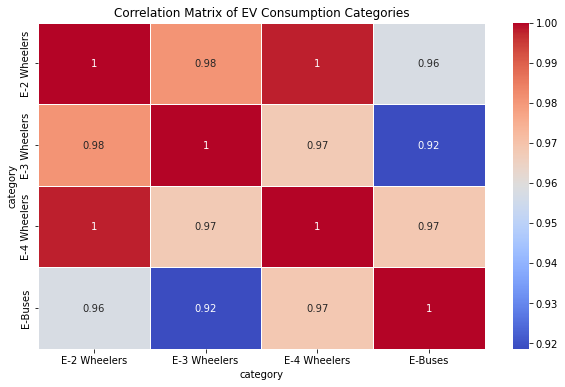

In [17]:
pivot_df = df.pivot(index='financial_year', columns='category', values='num_vehicles')
corr_matrix = pivot_df.corr()
corr_matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of EV Consumption Categories')
plt.show()